#Import Libraries

In [82]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

#Read Image

In [83]:
image = cv2.imread('/content/lena15.jpg',0)

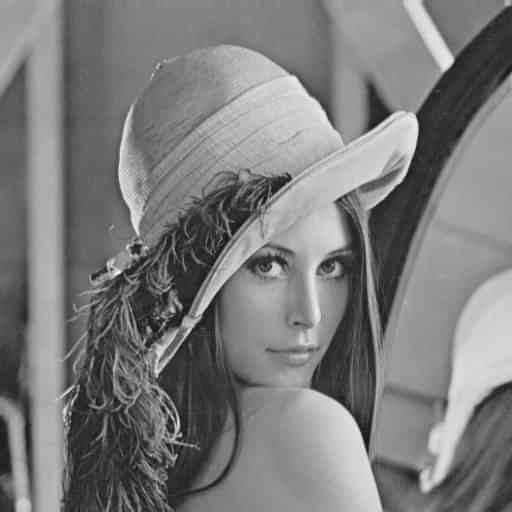

In [84]:
cv2_imshow(image)

#Apply Padding on the image

In [85]:
def pad_image(image, kernel_size):
    height, width = image.shape
    pad_height = kernel_size[0] // 2
    pad_width = kernel_size[1] // 2
    padded_image = np.zeros((height + 2*pad_height, width + 2*pad_width))
    padded_image[pad_height:height+pad_height, pad_width:width+pad_width] = image
    start_row = pad_height
    end_row = (start_row + height)
    start_col = pad_width
    end_col = (start_col + width)
    return padded_image, start_row, end_row, start_col, end_col

In [86]:
def unpad_image(padded_image, start_row, end_row, start_col, end_col):
    unpadded_image = padded_image[start_row:end_row, start_col:end_col]
    return unpadded_image


In [87]:
padded_image, start_row, end_row, start_col, end_col = pad_image(image,(2,2))

#Take Copies for the original image after padding

In [88]:
Output_image = padded_image.copy()
Output_image2 = padded_image.copy()

#Apply Robert Cross Gradient Operators

In [89]:
Robert_kernel1 =[[-1,0],
        [0,1]]

Result = 0
for r in range(start_row,end_row):
  for c in range(start_col,end_col):
    rs = r;  
    Result = 0
    for i in range(2):
      cs = c
      for k in range(2):
        Value = padded_image[rs,cs] * Robert_kernel1[i][k] 
        Result += Value
        cs = cs+ 1
      rs = rs + 1 

    Output_image[r][c] = Result  

In [90]:
Robert_kernel2 =[[0,-1],
        [1,0]]

Result2 = 0
for r in range(start_row,end_row):
  for c in range(start_col,end_col):
    rs = r;  
    Result2 = 0
    for i in range(2):
      cs = c
      for k in range(2):
        Value = padded_image[rs,cs] * Robert_kernel2[i][k] 
        Result2 += Value
        cs = cs+ 1
      rs = rs + 1 

    Output_image2[r][c] = Result2 

In [91]:
Output_image=unpad_image(Output_image, start_row, end_row, start_col, end_col)
Output_image2=unpad_image(Output_image2, start_row, end_row, start_col, end_col)


#Display Output image

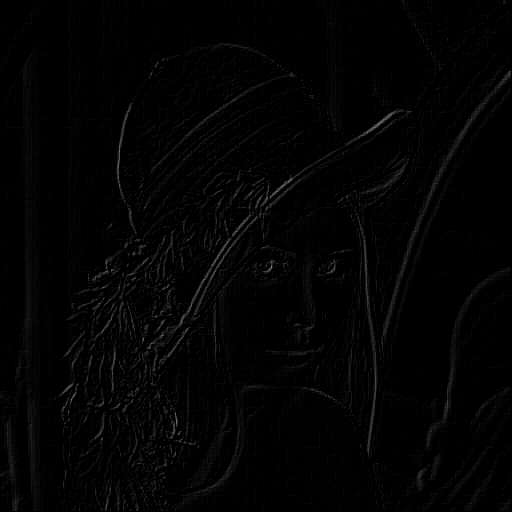

In [92]:
cv2_imshow(Output_image)


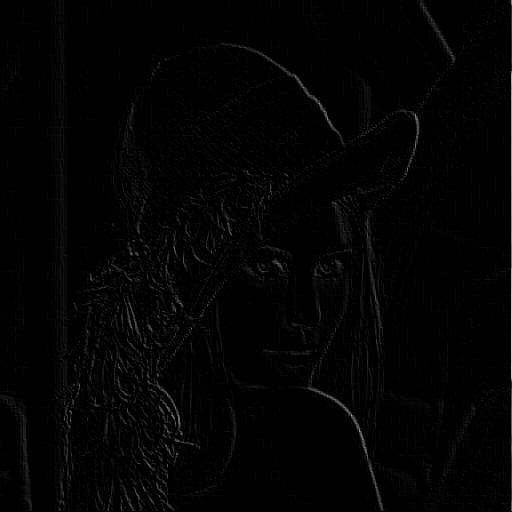

In [93]:
cv2_imshow(Output_image2)


#Unsharp Masking and Highboost Filtering

#Read The image

In [94]:
UnSharp_image = cv2.imread('/content/lena15.jpg',0)

#Apply Padding on the image

In [95]:
Kernel_size = (3,3)
Padded_UnSharp_image,start_row2, end_row2, start_col2, end_col2 = pad_image(UnSharp_image,Kernel_size)

#Take Copies for the original image after padding

In [96]:
Original_image = Padded_UnSharp_image.copy()
Unsharp_Avg_image = Padded_UnSharp_image.copy()
Mask_image = Padded_UnSharp_image.copy()


#Get the Differnce between the Center cell and the start

In [97]:
def GetBack_Values(kernel_size):
  Dic= {}
  Value = 3
  Diff = 2
  for i in range(0,50):
    Dic.update({Value :Value - Diff})
    Value += 2
    Diff += 1
  return Dic

In [98]:
Kernel_dimensions = Kernel_size[0] * Kernel_size[1]
Back_Value = GetBack_Values(Kernel_size)

#Blur the image by applying average filter

In [99]:

V1 = 0
Avg = 0
Avg_Result = 0
Flag = False
for r in range(start_row2,end_row2):
  for c in range(start_col2,end_col2):
    rstart = r - Back_Value[Kernel_size[0]]
    cstart = c - Back_Value[Kernel_size[0]]
    Avg = 0
    i = 0
    while i < Kernel_size[0] and rstart < end_row2 and rstart >= start_row2:
        k = 0
        while k < Kernel_size[0] and cstart < end_col2 and cstart >= start_col2:
          V1 = Padded_UnSharp_image[rstart][cstart]
          Avg += V1
          cstart += 1
          k +=1
        i += 1
        rstart += 1

    Avg_Result = Avg / Kernel_dimensions
    Unsharp_Avg_image[r][c] =  Avg_Result




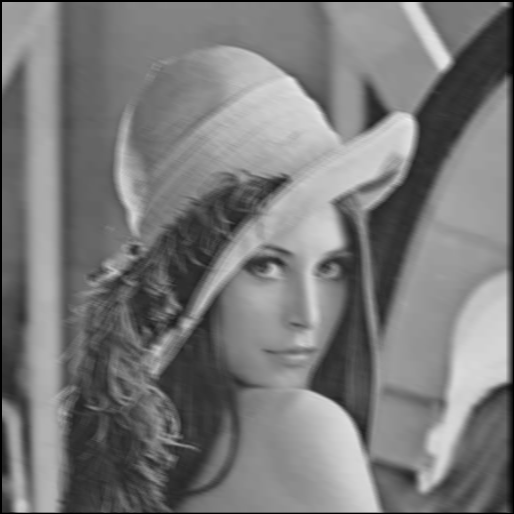

In [100]:
cv2_imshow(Unsharp_Avg_image)

#Get Mask By subtracting the blured image from the Original image

In [101]:
for r in range(start_row2,end_row2):
  for c in range(start_col2,end_col2):
    Mask_image[r][c] = Padded_UnSharp_image[r][c] - Unsharp_Avg_image[r][c]

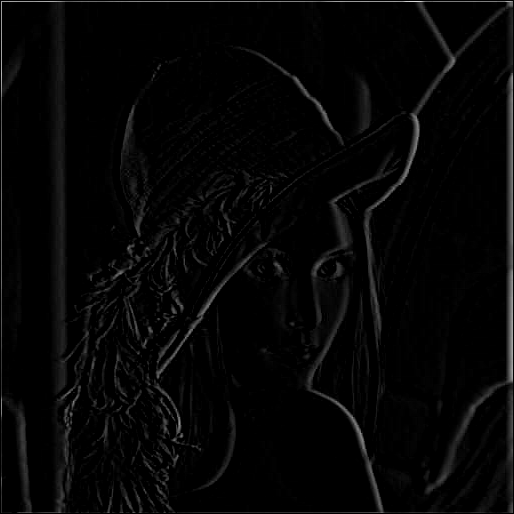

In [102]:
cv2_imshow(Mask_image)

#Add the Mask to the Original Image 

In [103]:
K_Value = 0
for r in range(start_row2,end_row2):
  for c in range(start_col2,end_col2):
    Padded_UnSharp_image[r][c] += (K_Value * Mask_image[r][c])

In [104]:
Final_UnSharp_image= unpad_image(Padded_UnSharp_image,start_row2, end_row2, start_col2, end_col2)

#Display Unsharp Image

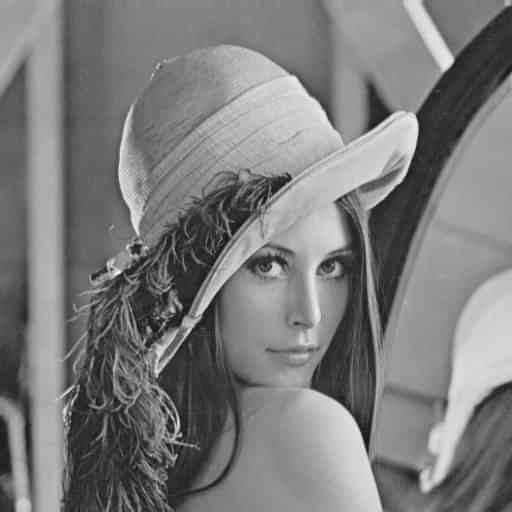

In [105]:
cv2_imshow(Final_UnSharp_image)

#Apply Highboost Filtering

In [106]:
K_Value = 2
for r in range(start_row2,end_row2):
  for c in range(start_col2,end_col2):
    Original_image[r][c] += (K_Value * Mask_image[r][c])

In [107]:
Highboost_image= unpad_image(Original_image,start_row2, end_row2, start_col2, end_col2)

#Display Highboost Image

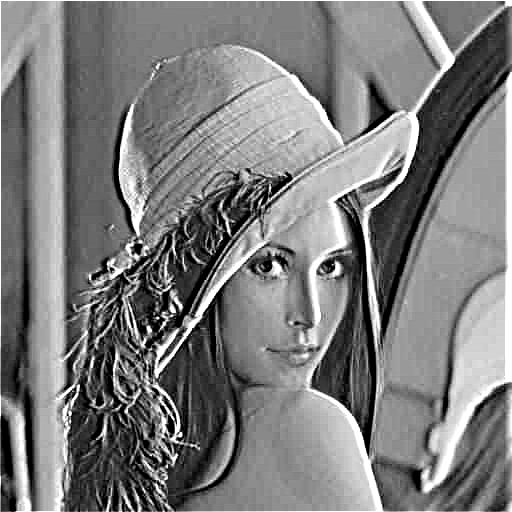

In [108]:
cv2_imshow(Highboost_image)

#Laplace Operator

#Read the image

In [109]:
Laplace_image = cv2.imread('/content/lena15.jpg',0)

#Padding the image

In [110]:
Kernel_size =(3,3)
Laplace_paded_image, start_row3, end_row3, start_col3, end_col3 = pad_image(Laplace_image,Kernel_size)

#Get kernel Dimensions

In [111]:
Kernel_dimensions = Kernel_size[0] * Kernel_size[1]
Back_Value = GetBack_Values(Kernel_size)

#Copy images from the padded image

In [112]:
Laplace_image1=Laplace_paded_image.copy()
Laplace_image2=Laplace_paded_image.copy()
Laplace_image3=Laplace_paded_image.copy()
Laplace_image4=Laplace_paded_image.copy()

#Apply Laplace first filter

In [113]:
Laplace_kernel1 =[[0,1,0],
                  [1,-4,1],
                  [0,1,0]]
V1 = 0
Result = 0
for r in range(start_row3,end_row3):
  for c in range(start_col3,end_col3):
    rstart = r - Back_Value[Kernel_size[0]]
    cstart = c - Back_Value[Kernel_size[0]]
    Result = 0
    i = 0
    while i < Kernel_size[0] and rstart < end_row3 and rstart >= start_row3:
        k = 0
        while k < Kernel_size[0] and cstart < end_col3 and cstart >= start_col3:
          V1 = Laplace_paded_image[rstart][cstart] * Laplace_kernel1[i][k]
          Result += V1
          cstart += 1
          k +=1
        i += 1
        rstart += 1
    Laplace_image1[r][c] = Result      

#Apply Laplace second filter

In [114]:
Laplace_kernel2 =[[0,-1,0],
                  [-1,4,-1],
                  [0,-1,0]]
V2 = 0
Result2 = 0
for r in range(start_row3,end_row3):
  for c in range(start_col3,end_col3):
    rstart = r - Back_Value[Kernel_size[0]]
    cstart = c - Back_Value[Kernel_size[0]]
    Result2 = 0
    i = 0
    while i < Kernel_size[0] and rstart < end_row3 and rstart >= start_row3:
        k = 0
        while k < Kernel_size[0] and cstart < end_col3 and cstart >= start_col3:
          V2 = Laplace_paded_image[rstart][cstart] * Laplace_kernel2[i][k]
          Result2 += V2
          cstart += 1
          k +=1
        i += 1
        rstart += 1
    Laplace_image2[r][c] = Result2 

#Apply Laplace third filter

In [115]:
Laplace_kernel3 =[[1,1,1],
                  [1,-8,1],
                  [1,1,1]]
V3 = 0
Result3 = 0
for r in range(start_row3,end_row3):
  for c in range(start_col3,end_col3):
    rstart = r - Back_Value[Kernel_size[0]]
    cstart = c - Back_Value[Kernel_size[0]]
    Result3 = 0
    i = 0
    while i < Kernel_size[0] and rstart < end_row3 and rstart >= start_row3:
        k = 0
        while k < Kernel_size[0] and cstart < end_col3 and cstart >= start_col3:
          V3 = Laplace_paded_image[rstart][cstart] * Laplace_kernel3[i][k]
          Result3 += V3
          cstart += 1
          k +=1
        i += 1
        rstart += 1
    Laplace_image3[r][c] = Result3 

#Apply Laplace fourth filter

In [116]:
Laplace_kernel4 =[[-1,-1,-1],
                  [-1,8,-1],
                  [-1,-1,-1]]
V4 = 0
Result4 = 0
for r in range(start_row3,end_row3):
  for c in range(start_col3,end_col3):
    rstart = r - Back_Value[Kernel_size[0]]
    cstart = c - Back_Value[Kernel_size[0]]
    Result4 = 0
    i = 0
    while i < Kernel_size[0] and rstart < end_row3 and rstart >= start_row3:
        k = 0
        while k < Kernel_size[0] and cstart < end_col3 and cstart >= start_col3:
          V4 = Laplace_paded_image[rstart][cstart] * Laplace_kernel4[i][k]
          Result4 += V4
          cstart += 1
          k +=1
        i += 1
        rstart += 1
    Laplace_image4[r][c] = Result4 

#unpadding the images before Displaying it

In [117]:
Laplace_image1 = unpad_image(Laplace_image1,start_row3,end_row3,start_col3,end_col3)
Laplace_image2 = unpad_image(Laplace_image2,start_row3,end_row3,start_col3,end_col3)
Laplace_image3 = unpad_image(Laplace_image3,start_row3,end_row3,start_col3,end_col3)
Laplace_image4 = unpad_image(Laplace_image4,start_row3,end_row3,start_col3,end_col3)

#Display images

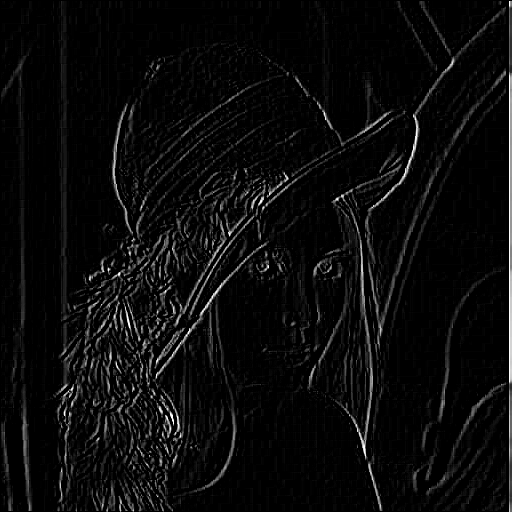

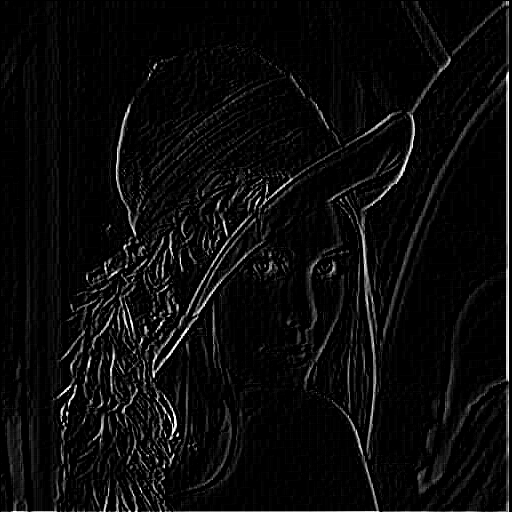

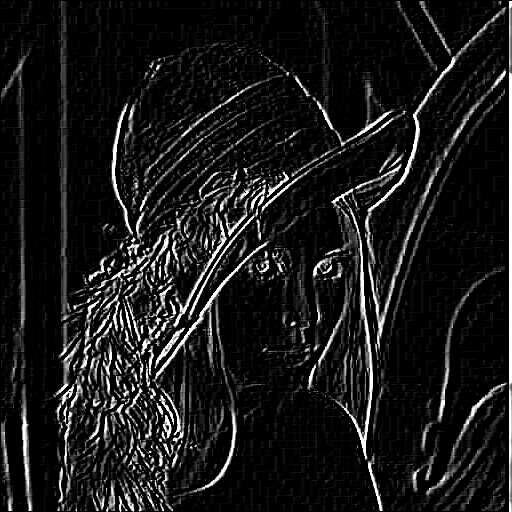

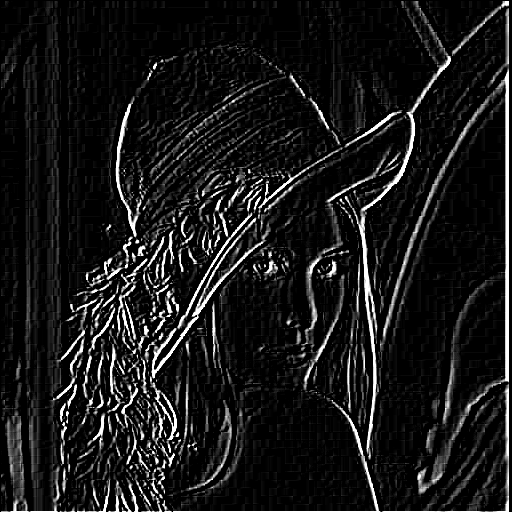

In [118]:
cv2_imshow(Laplace_image1)

cv2_imshow(Laplace_image2)

cv2_imshow(Laplace_image3)

cv2_imshow(Laplace_image4)

#Sobel Operator

#Read the image

In [119]:
Sobel_image = cv2.imread('/content/lena15.jpg',0)

#Padding the image

In [120]:
Kernel_size =(3,3)
Sobel_paded_image, start_row4, end_row4, start_col4, end_col4 = pad_image(Sobel_image,Kernel_size)

#Get kernel dimensions

In [121]:
Kernel_dimensions = Kernel_size[0] * Kernel_size[1]
Back_Value = GetBack_Values(Kernel_size)

#Copy images from the padded image

In [122]:
Sobel_image1 = Sobel_paded_image.copy()
Sobel_image2 = Sobel_paded_image.copy()

#Apply Sobel first filter

In [123]:
Sobel_kernel1 =[[-1,-2,-1],
                  [0,0,0],
                  [1,2,1]]
V1 = 0
Result = 0
for r in range(start_row4,end_row4):
  for c in range(start_col4,end_col4):
    rstart = r - Back_Value[Kernel_size[0]]
    cstart = c - Back_Value[Kernel_size[0]]
    Result = 0
    i = 0
    while i < Kernel_size[0] and rstart < end_row4 and rstart >= start_row4:
        k = 0
        while k < Kernel_size[0] and cstart < end_col4 and cstart >= start_col4:
          V1 = Sobel_paded_image[rstart][cstart] * Sobel_kernel1[i][k]
          Result += V1
          cstart += 1
          k +=1
        i += 1
        rstart += 1
    Sobel_image1[r][c] = Result  

#Apply Sobel second filter

In [124]:
Sobel_kernel2 =[[-1,0,-1],
                  [-2,0,2],
                  [-1,0,1]]
V1 = 0
Result= 0
for r in range(start_row4,end_row4):
  for c in range(start_col4,end_col4):
    rstart = r - Back_Value[Kernel_size[0]]
    cstart = c - Back_Value[Kernel_size[0]]
    Result = 0
    i = 0
    while i < Kernel_size[0] and rstart < end_row4 and rstart >= start_row4:
        k = 0
        while k < Kernel_size[0] and cstart < end_col4 and cstart >= start_col4:
          V1 = Sobel_paded_image[rstart][cstart] * Sobel_kernel2[i][k]
          Result += V1
          cstart += 1
          k +=1
        i += 1
        rstart += 1
    Sobel_image2[r][c] = Result  

#unpadding the images before Displaying it

In [125]:
Sobel_image1 = unpad_image(Sobel_image1,start_row4,end_row4,start_col4,end_col4)
Sobel_image2 = unpad_image(Sobel_image2,start_row4,end_row4,start_col4,end_col4)

#Display images

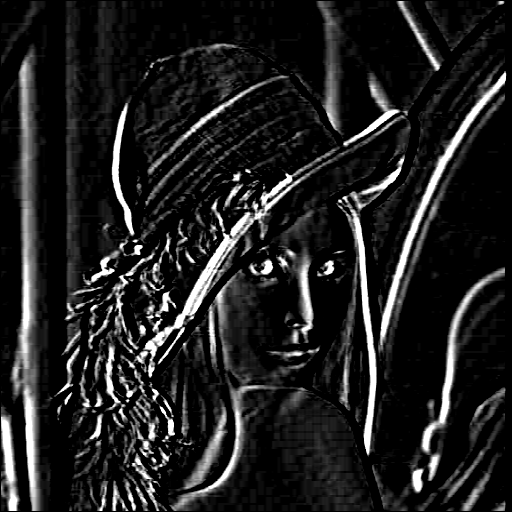

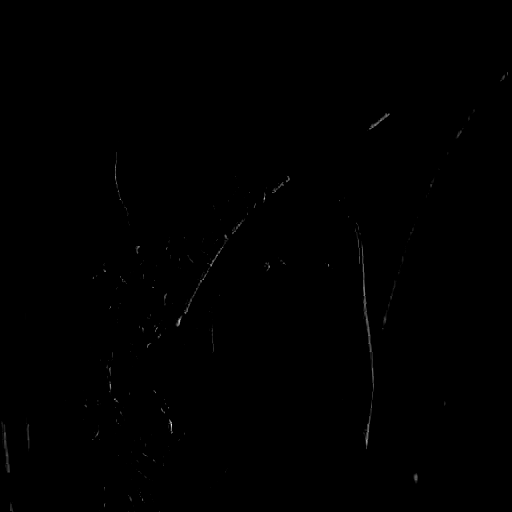

In [126]:
cv2_imshow(Sobel_image1)
cv2_imshow(Sobel_image2)